In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv("crime.csv")

X = data.drop('Murder', axis=1)
y = data['Murder']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)
print("Linear Regression R^2 Score:", r2)


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print("\nRandom Forest Mean Squared Error:", rf_mse)
print("Random Forest R^2 Score:", rf_r2)

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
print("\nGradient Boosting Mean Squared Error:", gb_mse)
print("Gradient Boosting R^2 Score:", gb_r2)

ransac_model = RANSACRegressor()
ransac_model.fit(X_train, y_train)
y_pred = ransac_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nRANSAC Regression Mean Squared Error:", mse)
print("RANSAC Regression R^2 Score:", r2)



Linear Regression Mean Squared Error: 7971.2551525407225
Linear Regression R^2 Score: 0.9822138963805072

Random Forest Mean Squared Error: 24844.05728000002
Random Forest R^2 Score: 0.9445659474380451

Gradient Boosting Mean Squared Error: 23576.24198018313
Gradient Boosting R^2 Score: 0.9473947985865038

RANSAC Regression Mean Squared Error: 7971.2551525407225
RANSAC Regression R^2 Score: 0.9822138963805072


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv("crime.csv")


X = data.drop('Murder', axis=1)
y = data['Murder']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10, 20]}
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 5, 7]}
ransac_params = {'max_trials': [50, 100, 200]}


rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_params, cv=5)
rf_grid.fit(X_train, y_train)

gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=gb_params, cv=5)
gb_grid.fit(X_train, y_train)

ransac_grid = GridSearchCV(RANSACRegressor(), param_grid=ransac_params, cv=5)
ransac_grid.fit(X_train, y_train)


rf_y_pred = rf_grid.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print("Random Forest Mean Squared Error (after tuning):", rf_mse)
print("Random Forest R^2 Score (after tuning):", rf_r2)

gb_y_pred = gb_grid.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
print("\nGradient Boosting Mean Squared Error (after tuning):", gb_mse)
print("Gradient Boosting R^2 Score (after tuning):", gb_r2)

ransac_y_pred = ransac_grid.predict(X_test)
ransac_mse = mean_squared_error(y_test, ransac_y_pred)
ransac_r2 = r2_score(y_test, ransac_y_pred)
print("\nRANSAC Regression Mean Squared Error (after tuning):", ransac_mse)
print("RANSAC Regression R^2 Score (after tuning):", ransac_r2)


KeyboardInterrupt: 

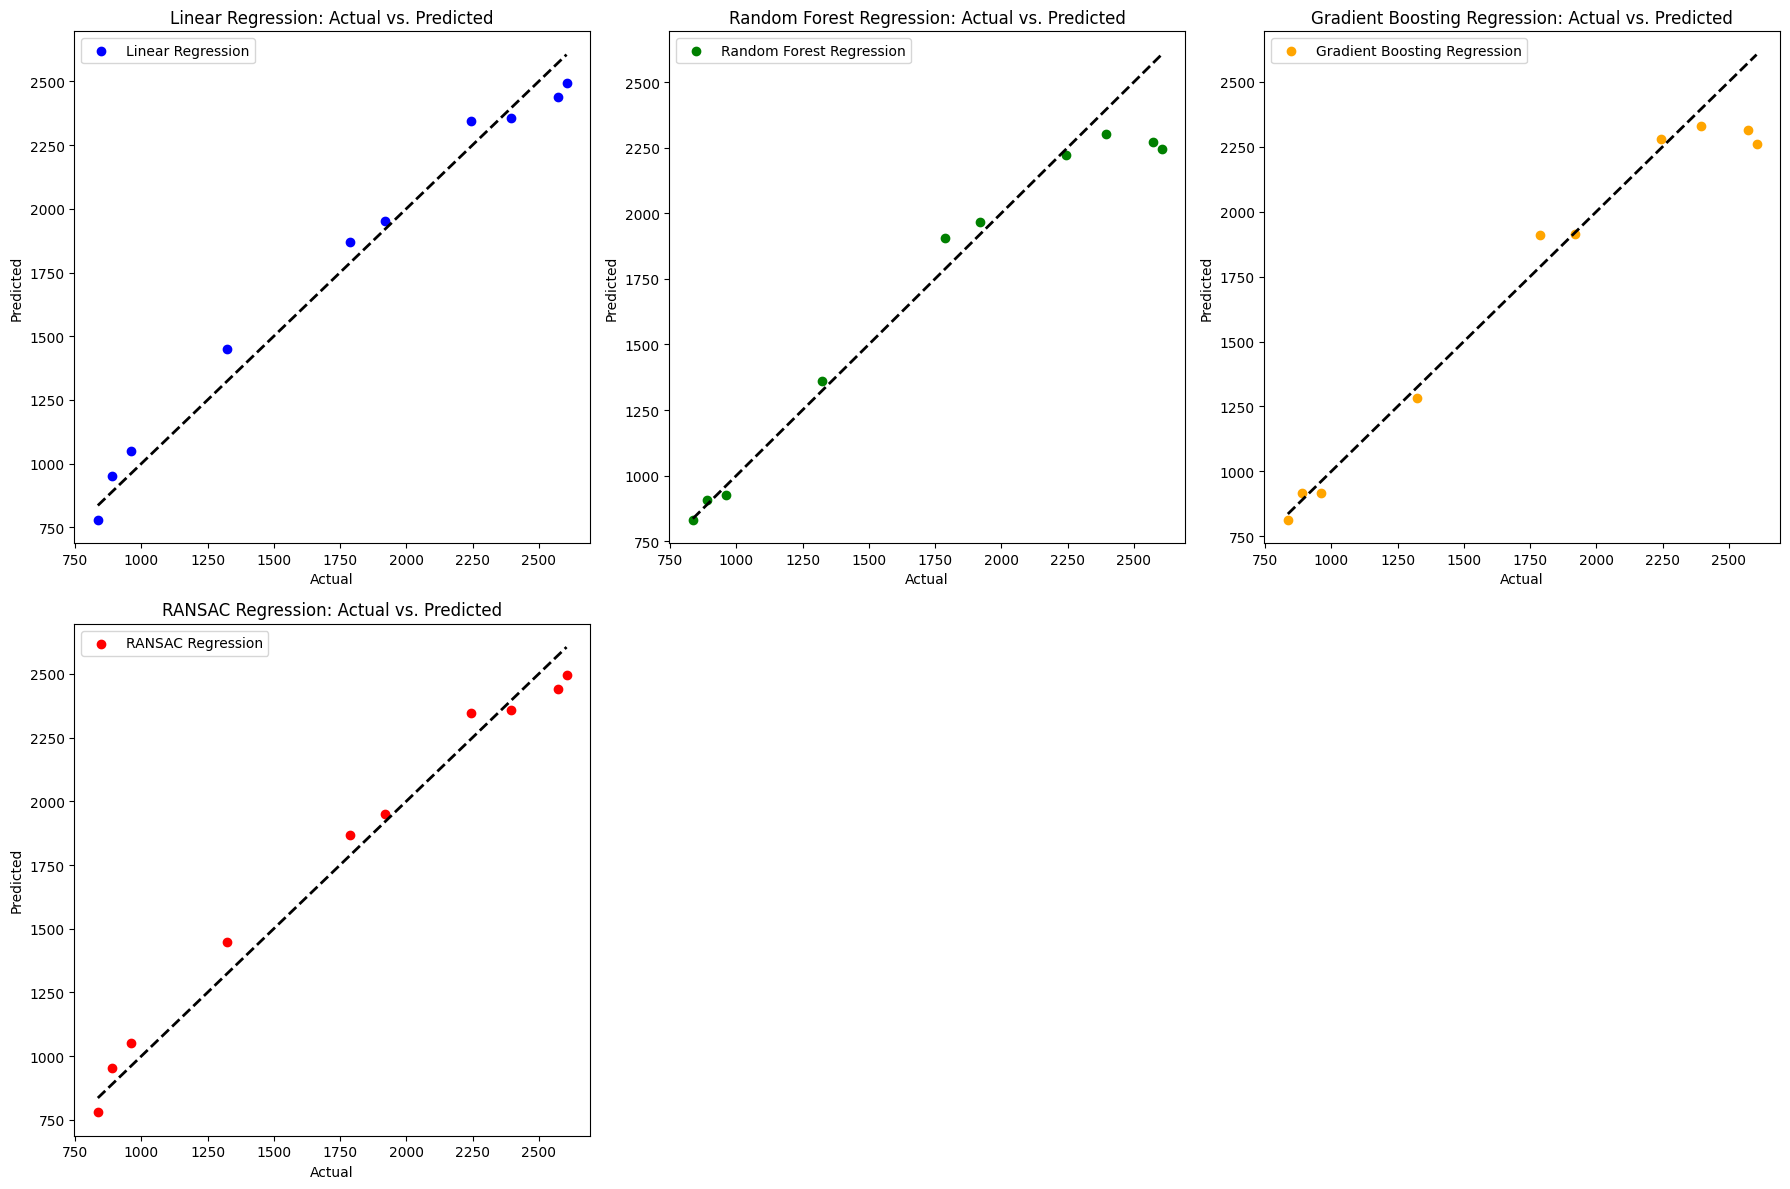

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()

plt.subplot(2, 3, 2)
plt.scatter(y_test, rf_y_pred, color='green', label='Random Forest Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression: Actual vs. Predicted')
plt.legend()


plt.subplot(2, 3, 3)
plt.scatter(y_test, gb_y_pred, color='orange', label='Gradient Boosting Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regression: Actual vs. Predicted')
plt.legend()


ransac_y_pred = ransac_model.predict(X_test)  
plt.subplot(2, 3, 4)
plt.scatter(y_test, ransac_y_pred, color='red', label='RANSAC Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RANSAC Regression: Actual vs. Predicted')
plt.legend()



plt.tight_layout()
plt.show()


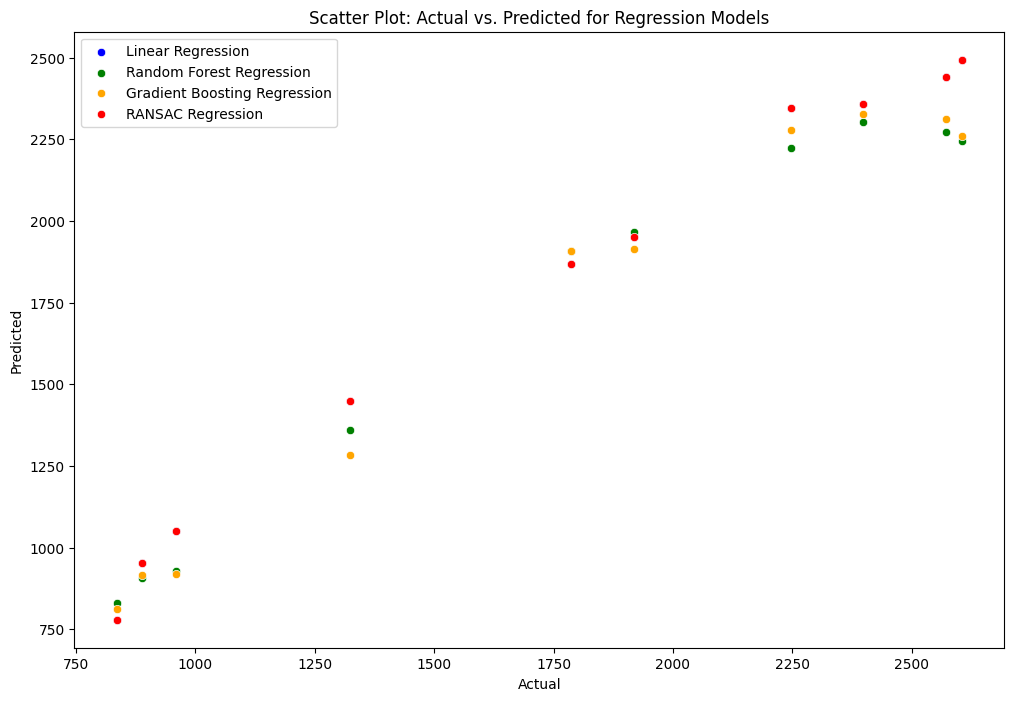

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))


sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Linear Regression')

sns.scatterplot(x=y_test, y=rf_y_pred, color='green', label='Random Forest Regression')

sns.scatterplot(x=y_test, y=gb_y_pred, color='orange', label='Gradient Boosting Regression')

sns.scatterplot(x=y_test, y=y_pred, color='red', label='RANSAC Regression')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot: Actual vs. Predicted for Regression Models')
plt.legend()

plt.show()


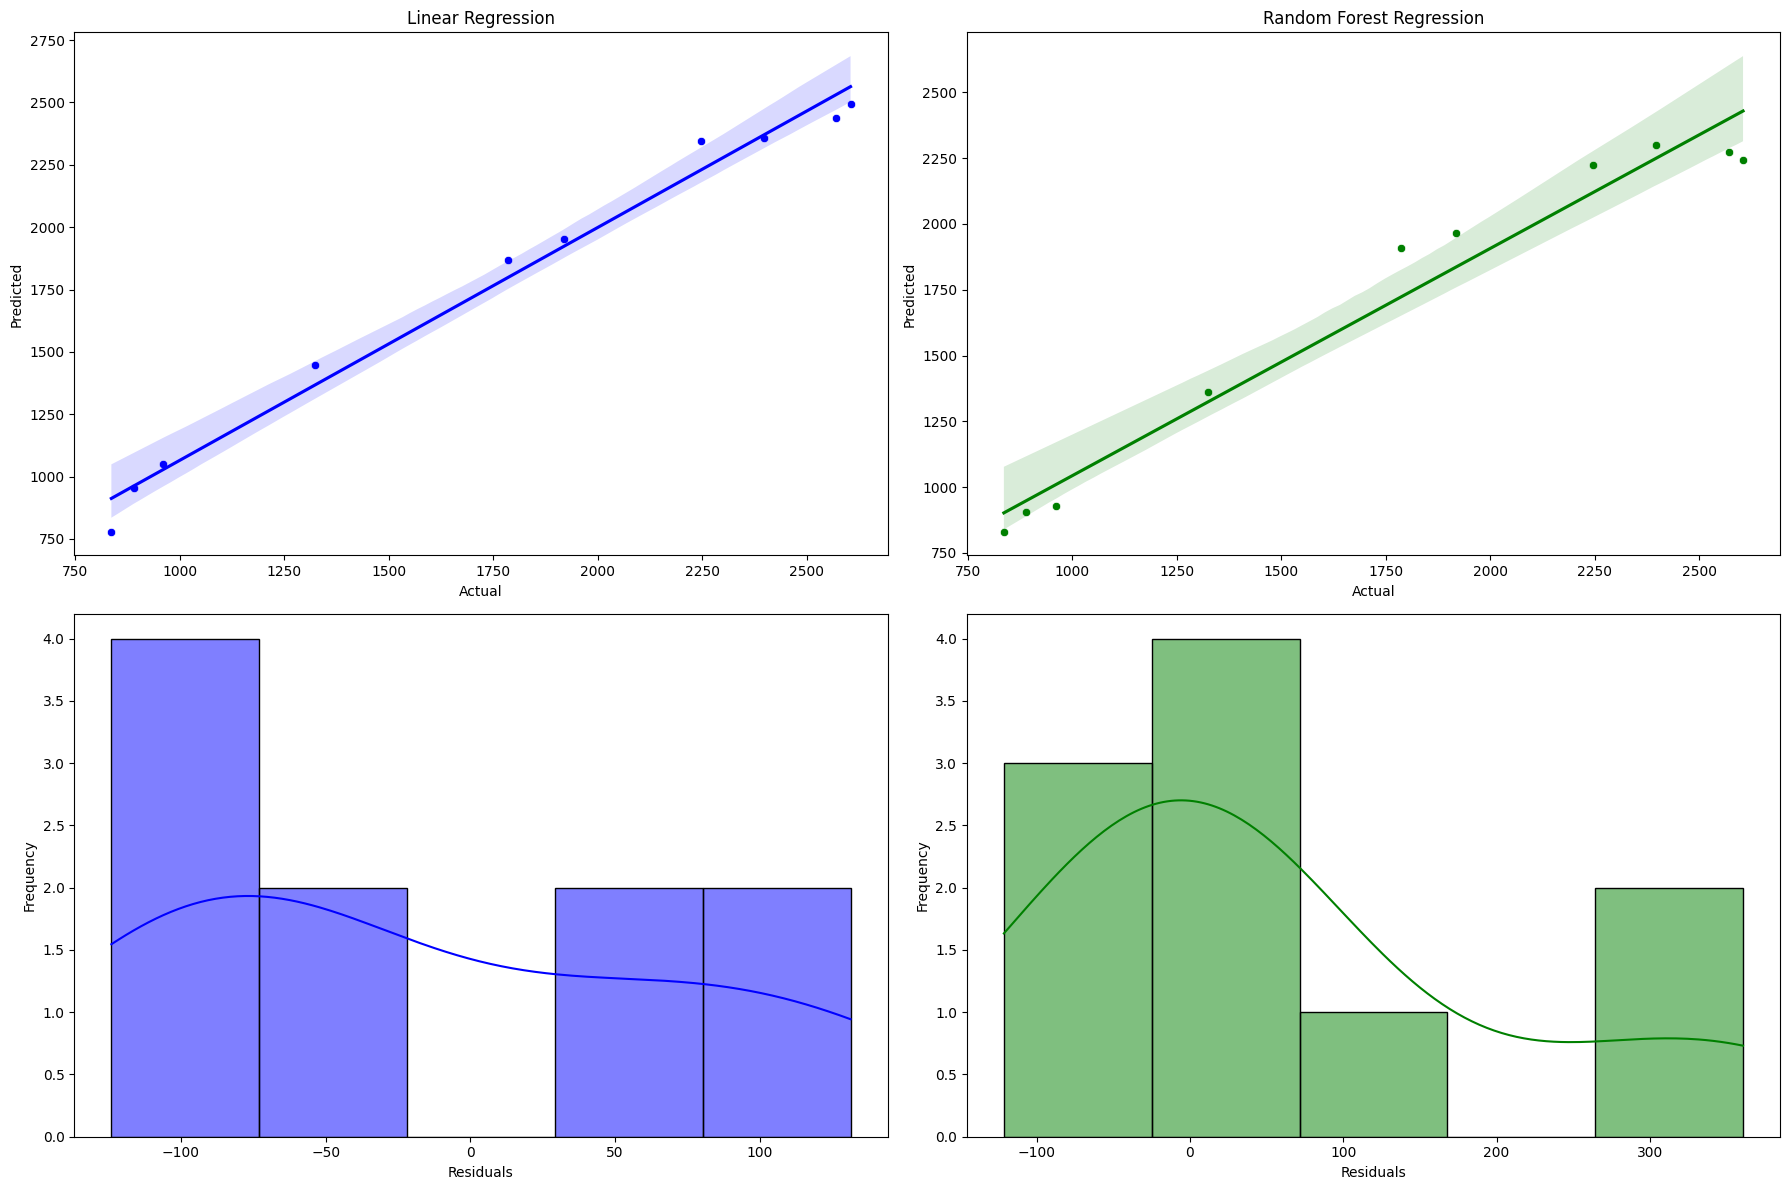

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

sns.scatterplot(x=y_test, y=y_pred, color='blue', ax=axes[0, 0])
sns.regplot(x=y_test, y=y_pred, scatter=False, color='blue', ax=axes[0, 0])
sns.histplot(y_test - y_pred, kde=True, color='blue', ax=axes[1, 0])
axes[0, 0].set_title('Linear Regression')
axes[0, 0].set_xlabel('Actual')
axes[0, 0].set_ylabel('Predicted')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')

sns.scatterplot(x=y_test, y=rf_y_pred, color='green', ax=axes[0, 1])
sns.regplot(x=y_test, y=rf_y_pred, scatter=False, color='green', ax=axes[0, 1])
sns.histplot(y_test - rf_y_pred, kde=True, color='green', ax=axes[1, 1])
axes[0, 1].set_title('Random Forest Regression')
axes[0, 1].set_xlabel('Actual')
axes[0, 1].set_ylabel('Predicted')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()


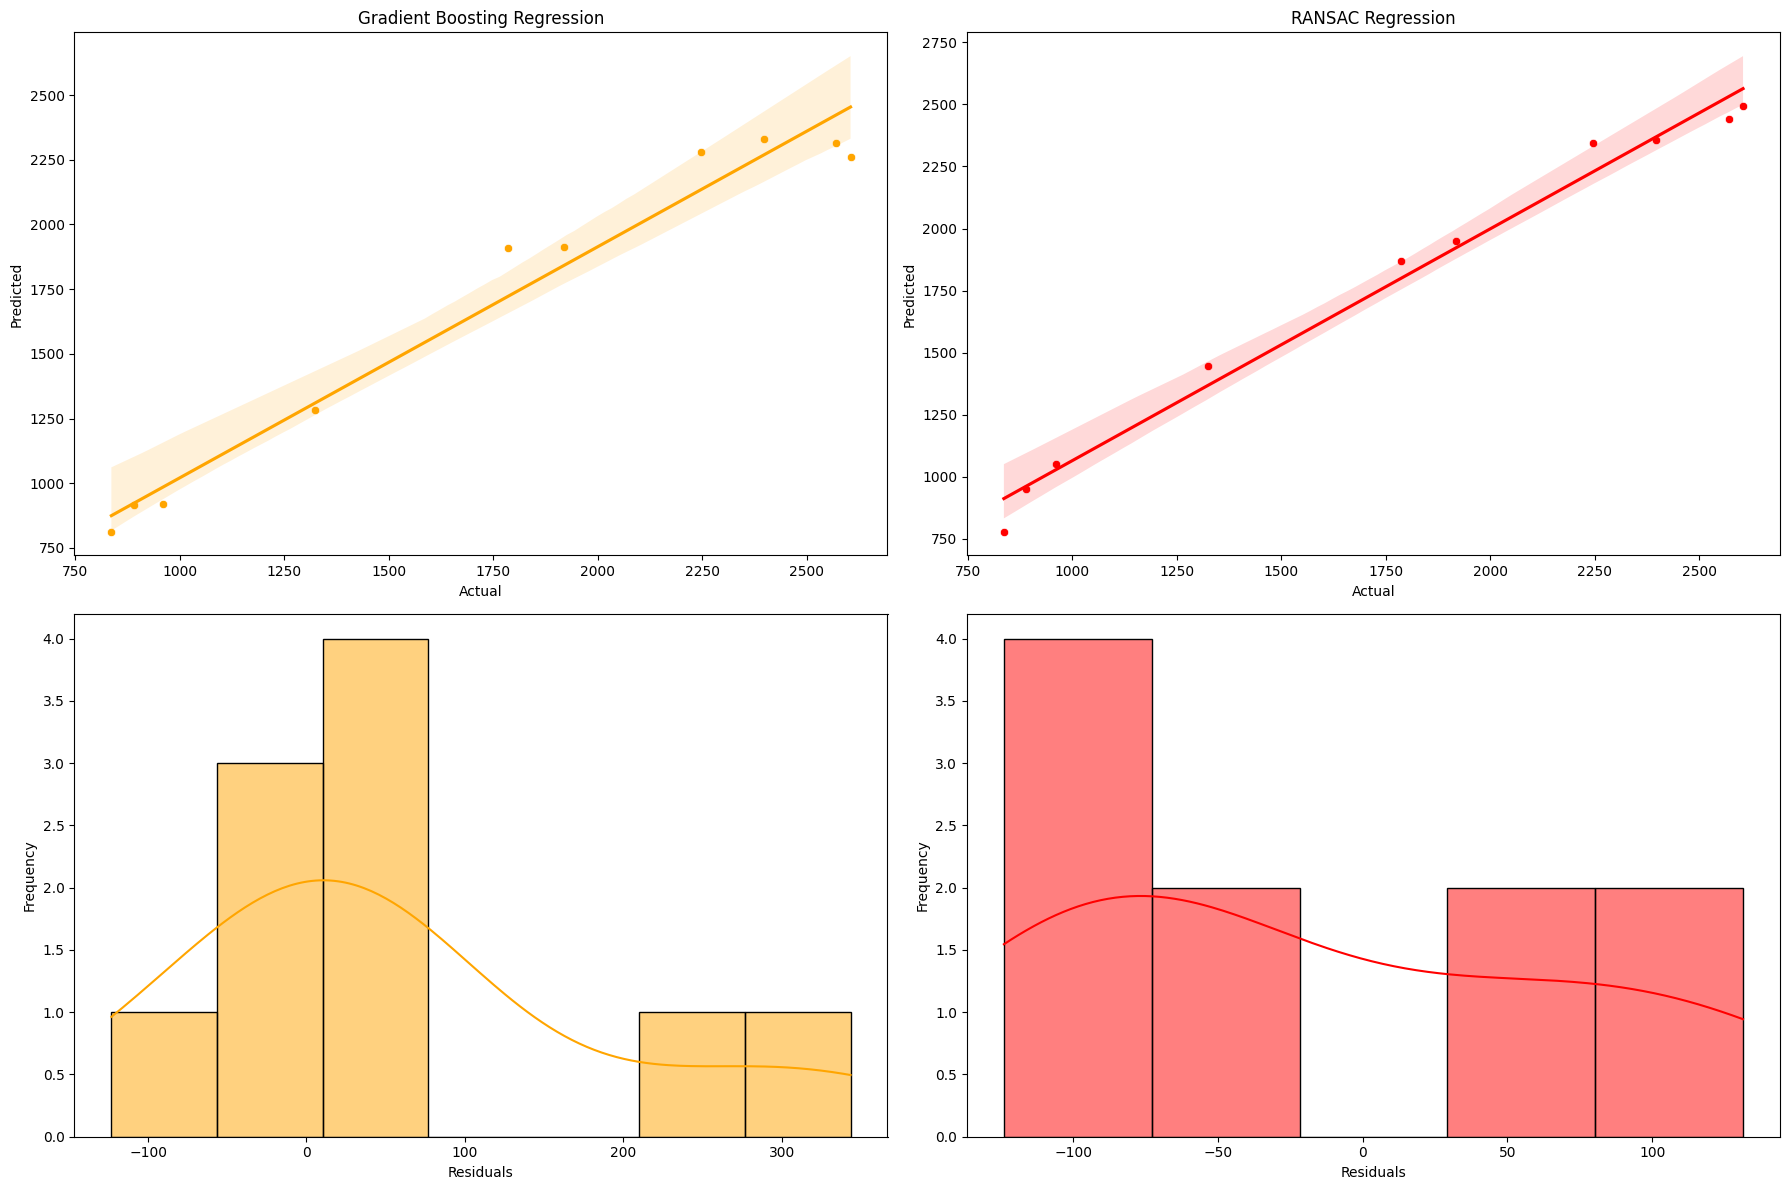

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))


sns.scatterplot(x=y_test, y=gb_y_pred, color='orange', ax=axes[0, 0])
sns.regplot(x=y_test, y=gb_y_pred, scatter=False, color='orange', ax=axes[0, 0])
sns.histplot(y_test - gb_y_pred, kde=True, color='orange', ax=axes[1, 0])
axes[0, 0].set_title('Gradient Boosting Regression')
axes[0, 0].set_xlabel('Actual')
axes[0, 0].set_ylabel('Predicted')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')

sns.scatterplot(x=y_test, y=y_pred, color='red', ax=axes[0, 1])
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', ax=axes[0, 1])
sns.histplot(y_test - y_pred, kde=True, color='red', ax=axes[1, 1])
axes[0, 1].set_title('RANSAC Regression')
axes[0, 1].set_xlabel('Actual')
axes[0, 1].set_ylabel('Predicted')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()
